In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Since data has some NA value, so we need drop NA

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

#define what x and y is
X = data.drop(['median_house_value'], axis=1) #x is the table without median_house_value
Y = data['median_house_value'] #y is the table only with median_house_value

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #we are going to use 20% of data for evaluating

In [11]:
train_data = X_train.join(Y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6593,-118.18,34.17,43.0,4269.0,591.0,1467.0,582.0,9.0702,<1H OCEAN,500001.0
17565,-121.90,37.32,48.0,1274.0,313.0,971.0,291.0,3.7738,<1H OCEAN,220600.0
1125,-121.59,39.75,20.0,908.0,206.0,481.0,211.0,2.2000,INLAND,80800.0
2075,-119.84,36.75,34.0,1186.0,300.0,774.0,271.0,1.5750,INLAND,57100.0
2327,-119.71,36.81,19.0,1648.0,368.0,557.0,354.0,1.7969,INLAND,72800.0
...,...,...,...,...,...,...,...,...,...,...
2241,-119.81,36.83,10.0,5780.0,922.0,2712.0,883.0,5.6445,INLAND,135500.0
5661,-118.28,33.74,44.0,1853.0,556.0,2090.0,539.0,1.8584,NEAR OCEAN,248100.0
16847,-122.41,37.61,46.0,2975.0,643.0,1479.0,577.0,3.8214,NEAR OCEAN,273600.0
15744,-122.43,37.78,52.0,1952.0,628.0,1284.0,576.0,2.1050,NEAR BAY,316700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

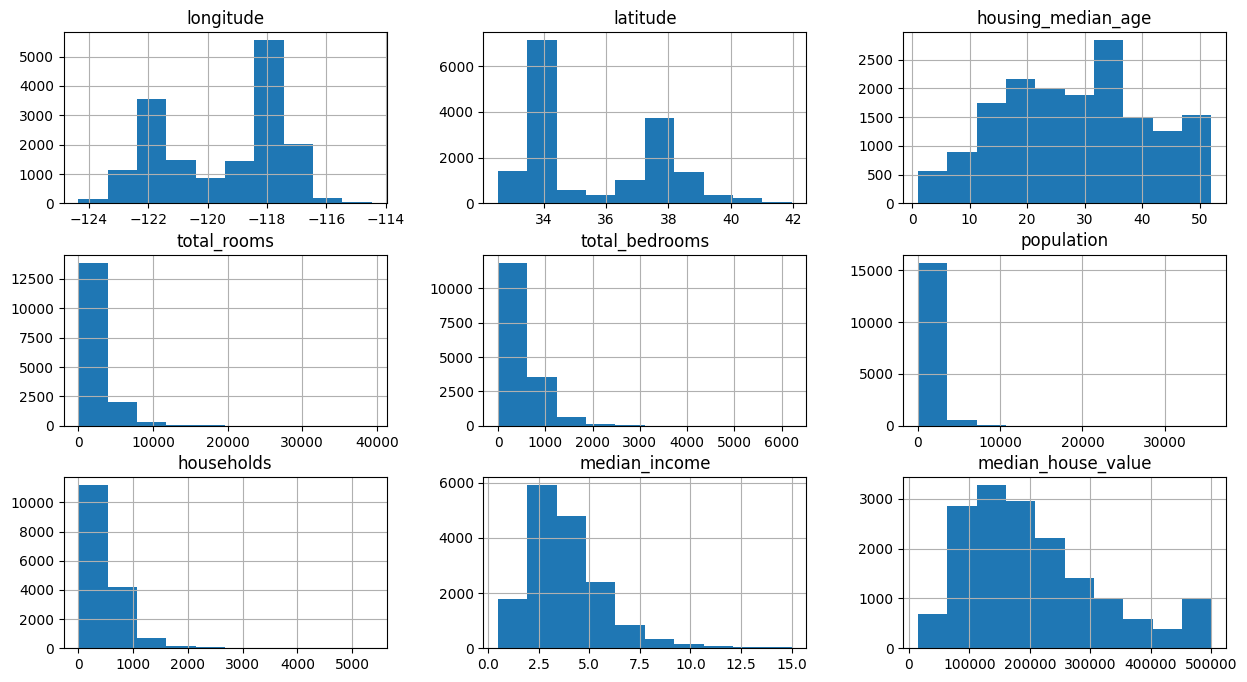

In [13]:
train_data.hist(figsize=(15,8)) #figsize chanage the size of img

In [14]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7228
INLAND        5207
NEAR OCEAN    2114
NEAR BAY      1794
ISLAND           3
Name: count, dtype: int64

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6593,-118.18,34.17,43.0,4269.0,591.0,1467.0,582.0,9.0702,500001.0,True,False,False,False,False
17565,-121.90,37.32,48.0,1274.0,313.0,971.0,291.0,3.7738,220600.0,True,False,False,False,False
1125,-121.59,39.75,20.0,908.0,206.0,481.0,211.0,2.2000,80800.0,False,True,False,False,False
2075,-119.84,36.75,34.0,1186.0,300.0,774.0,271.0,1.5750,57100.0,False,True,False,False,False
2327,-119.71,36.81,19.0,1648.0,368.0,557.0,354.0,1.7969,72800.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,-119.81,36.83,10.0,5780.0,922.0,2712.0,883.0,5.6445,135500.0,False,True,False,False,False
5661,-118.28,33.74,44.0,1853.0,556.0,2090.0,539.0,1.8584,248100.0,False,False,False,False,True
16847,-122.41,37.61,46.0,2975.0,643.0,1479.0,577.0,3.8214,273600.0,False,False,False,False,True
15744,-122.43,37.78,52.0,1952.0,628.0,1284.0,576.0,2.1050,316700.0,False,False,False,True,False


In [17]:
train_data.corr() #gives a correlation matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924849,-0.115202,0.049500,0.073929,0.104673,0.060074,-0.013838,-0.045449,0.313951,-0.054377,0.008436,-0.473357,0.051436
latitude,-0.924849,1.000000,0.018571,-0.037326,-0.068363,-0.110624,-0.073065,-0.079356,-0.143357,-0.441672,0.350525,-0.014545,0.359530,-0.167314
housing_median_age,-0.115202,0.018571,1.000000,-0.363327,-0.321829,-0.300639,-0.303985,-0.127255,0.103301,0.041517,-0.231533,0.016290,0.258148,0.018901
total_rooms,0.049500,-0.037326,-0.363327,1.000000,0.930423,0.854237,0.916418,0.203408,0.133829,-0.005827,0.032705,-0.006451,-0.027284,-0.011110
total_bedrooms,0.073929,-0.068363,-0.321829,0.930423,1.000000,0.874739,0.977999,-0.003272,0.052016,0.016375,-0.001716,-0.003421,-0.023269,-0.000039
population,0.104673,-0.110624,-0.300639,0.854237,0.874739,1.000000,0.906147,0.009288,-0.024129,0.073934,-0.015697,-0.009889,-0.064031,-0.027587
households,0.060074,-0.073065,-0.303985,0.916418,0.977999,0.906147,1.000000,0.017885,0.067576,0.041086,-0.034783,-0.008529,-0.014693,0.001518
median_income,-0.013838,-0.079356,-0.127255,0.203408,-0.003272,0.009288,0.017885,1.000000,0.686857,0.168053,-0.234642,-0.007933,0.053135,0.027890
median_house_value,-0.045449,-0.143357,0.103301,0.133829,0.052016,-0.024129,0.067576,0.686857,1.000000,0.261804,-0.484481,0.022618,0.155452,0.139481
<1H OCEAN,0.313951,-0.441672,0.041517,-0.005827,0.016375,0.073934,0.041086,0.168053,0.261804,1.000000,-0.608737,-0.012063,-0.312615,-0.343146


<Axes: >

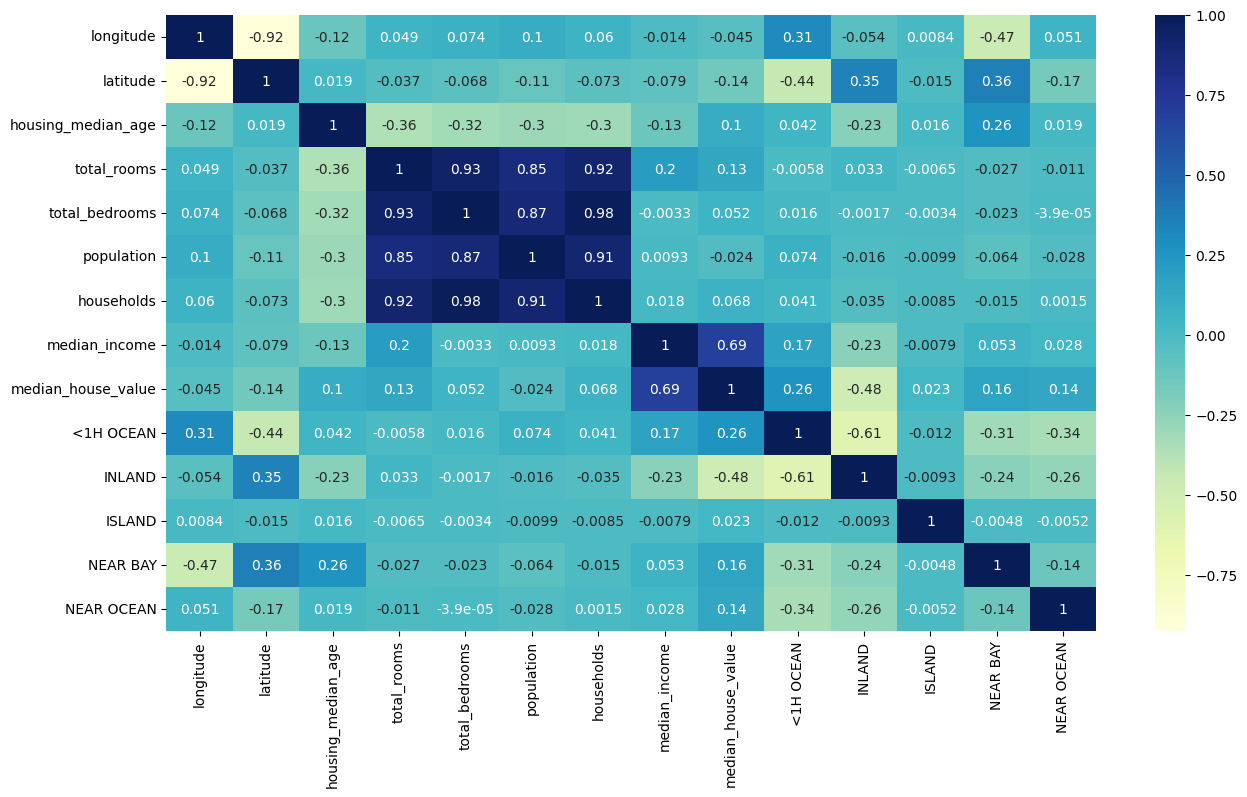

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") #annotation true

In [19]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

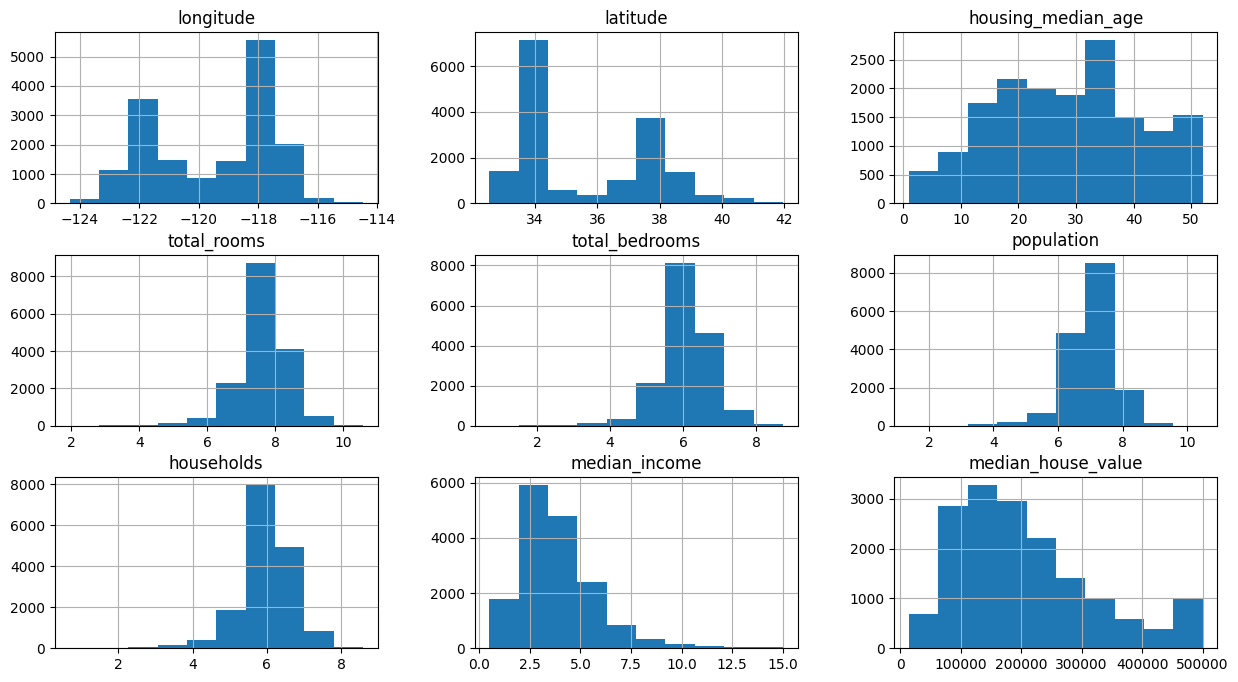

In [20]:
train_data.hist(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

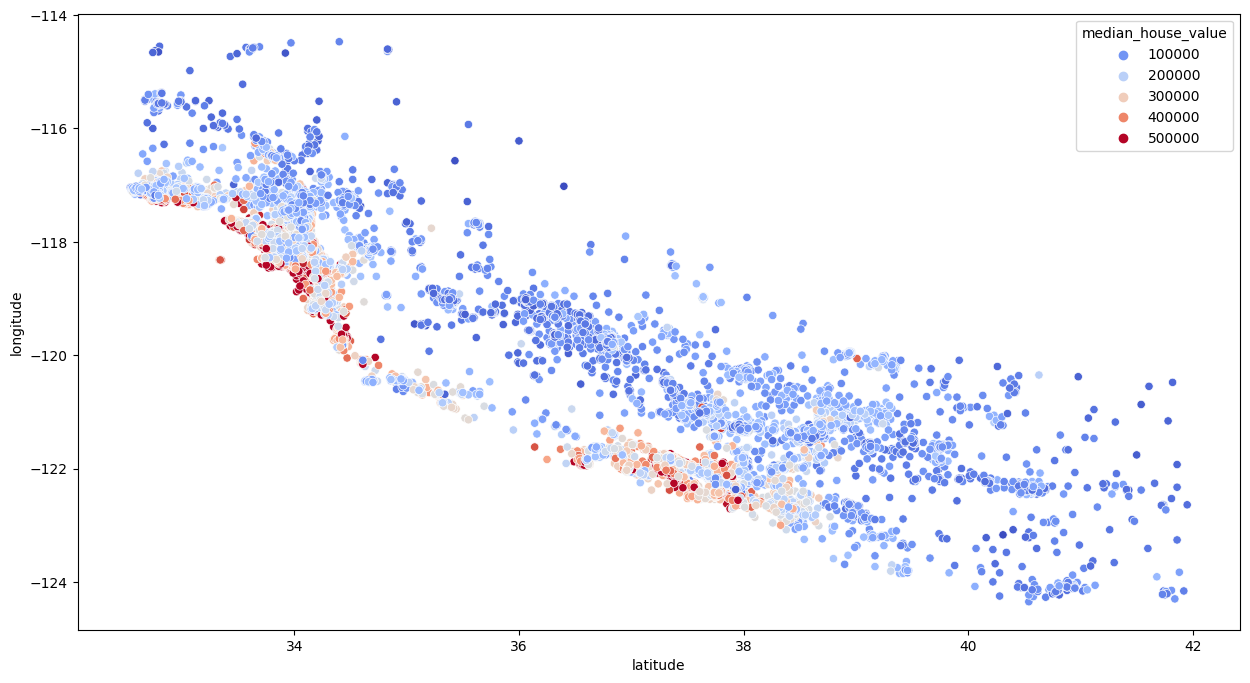

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "latitude", y ="longitude", data= train_data, hue = "median_house_value", palette="coolwarm")

In [22]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

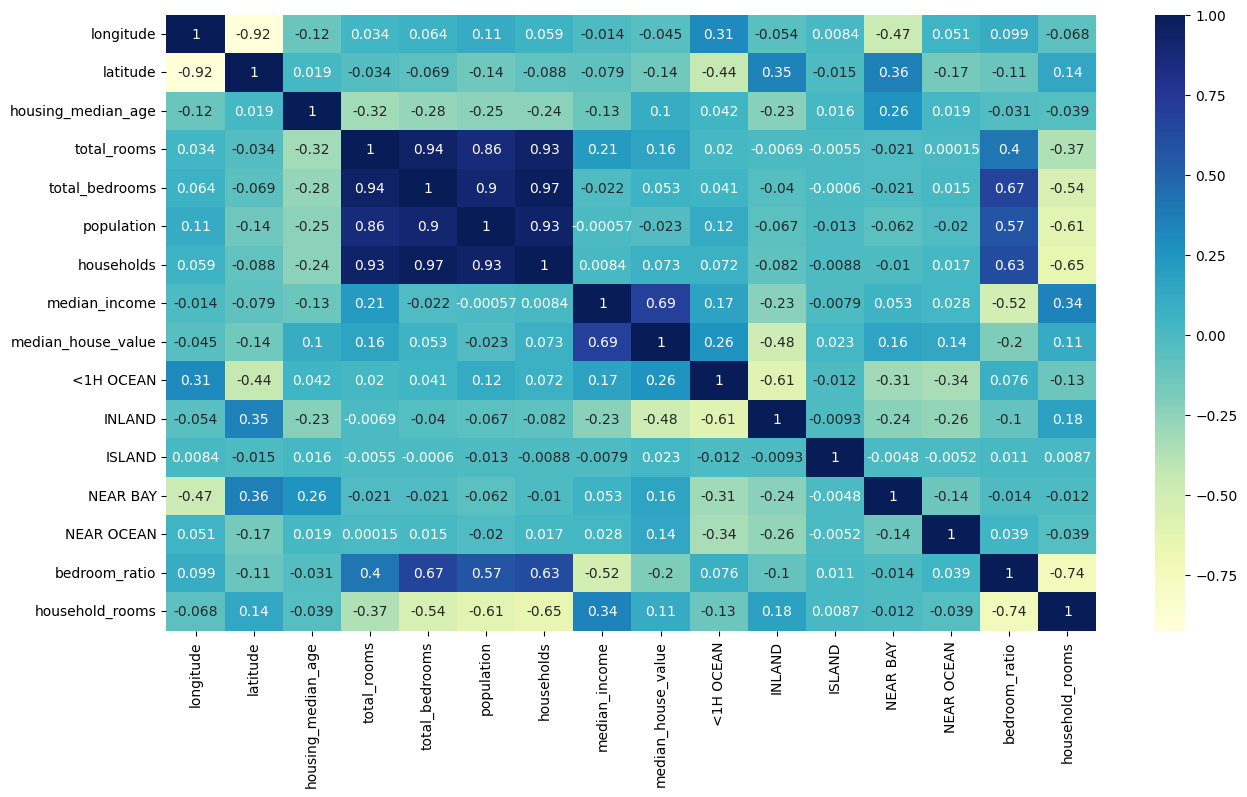

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") #annotation true

# Linear regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [25]:
test_data = X_test.join(Y_test)


test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)


test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [26]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [27]:
X_test_s = scaler.fit_transform(X_test)

In [28]:
X_test_s

array([[ 1.29283645, -1.40467301, -1.78593177, ...,  2.63654355,
         0.49189336, -0.4474826 ],
       [ 0.74923788, -0.81119244,  0.09203347, ..., -0.37928446,
         1.42477895, -1.06761353],
       [ 0.68499441, -0.85719869,  1.10926464, ...,  2.63654355,
        -0.35292997, -0.03167392],
       ...,
       [ 1.23353479, -1.34486489, -1.39468901, ...,  2.63654355,
         1.42903701, -1.12991621],
       [ 0.63557636, -0.75138432,  0.32677912, ..., -0.37928446,
         1.10274752, -0.83027343],
       [-1.21265877,  1.68694672,  1.18751319, ..., -0.37928446,
        -0.28489208,  0.76991996]])

In [29]:
reg.score(X_test_s, Y_test)

-6.420485317581734e+20

# RandomForestGression

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [31]:
forest.score(X_test_s, Y_test)

0.7870466223050991

# Cross Validation

In [32]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[3, 10, 30],
    "max_features":[2,4,6,8]
}
grid_search = GridSearchCV(forest, param_grid, cv =5, scoring = "neg_mean_squared_error", return_train_score = True)
grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
best_forest = grid_search.best_estimator_

In [34]:
best_forest.score(X_test_s, Y_test)

0.7900990279209965

In [35]:
from sklearn.model_selection import GridSearchCV

fores = RandomForestRegressor()
param_grid = {
    "n_estimators":[100, 200, 300],
    "max_features":[2,4],
    "max_depth":[None, 4, 8]
}
grid_search = GridSearchCV(forest, param_grid, cv =5, scoring = "neg_mean_squared_error", return_train_score = True)
grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=200)

In [37]:
grid_search.best_estimator_.score(X_test_s, Y_test)

0.7922449323983544